#

<div align=left>
<img src="https://uol.unifor.br/acesso/app/autenticacao/assets/img/logos/icon-unifor.svg" width=55 height=55>

<br><br>
<font size=5 color='black'><strong>Cenário 02:</strong>

Projeto 01 - DFS

<strong>Equipe:</strong> 

Heitor Teixeira

João Guilherme 

Mariana Vieira

Felipe Cavalcante

<strong>Turma:</strong> 

T35EF

</div>

In [1]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
import networkx as nx
import matplotlib.pyplot as plt
import time

with open('grafos2.json', 'r') as file:
    grafo = json.load(file)

In [2]:
def matriz_adjacencia(dicionario):
    '''
    cria uma matriz de adjacencia a partir de um dicionario

        :param dicionario: dicionario completo que representa as bibliotecas com suas dependencias
        :return: matriz de adjacencia em formato de dataframe pandas
    '''
    vertices = list(dicionario.keys())
    
    matriz = pd.DataFrame(0, index=vertices, columns=vertices)
    
    for vertice, info in dicionario.items():
        for destino, peso in info['arestas'].items():
            matriz.at[vertice, destino] = peso
    
    return matriz


def matriz_incidencia(dicionario):
    '''
    cria uma matriz de incidencia a partir de um dicionario

        :param dicionario: dicionario completo que representa as bibliotecas com suas dependencias
        :return: matriz de incidencia em formato de dataframe pandas
    '''
    vertices = list(dicionario.keys())
    arestas = []

    for vertice, info in dicionario.items():
        for destino, peso in info['arestas'].items():
            arestas.append((vertice, destino, peso))
    
    matriz = pd.DataFrame(0, index=vertices, columns=[f"a{i+1}" for i in range(len(arestas))])
    
    for i, (vertice, destino, peso) in enumerate(arestas):
        matriz.at[vertice, f"a{i+1}"] = peso  
        matriz.at[destino, f"a{i+1}"] = - peso
    
    return matriz


def plotar_grafo(dicionario):
    '''
    plota o grafo a partir de um dicionario, esse dicionario contem a cor e posicao
    dos vertices, e desenha as arestas com os pesos(no nosso caso, sem peso)

        :param dicionario: dicionario completo que representa as bibliotecas com suas dependencias
    '''
    G = nx.DiGraph()  
    
    pos = {}
    cor = {}
    plt.figure(figsize=(10, 10)) 
    
    for vertice, info in dicionario.items():
        pos[vertice] = info['posicao']  
        cor[vertice] = info['cor'] 

        for destino, peso in info['arestas'].items():
            G.add_edge(vertice, destino)
    
    colors = [cor[vertice] for vertice in G.nodes()]

    nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, font_size=13, arrows=True, arrowsize=25, edge_color="gray")

    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title('DFS')
    plt.show()

def DFS(graph, library, visited, stack):
    '''
    realiza a DFS em um grafo de dependencias e plota durante o processo

        :param graph: dicionario completo que representa as bibliotecas com suas dependencias
        :param library: biblioteca ou dependencia atual que esta sendo visitada
        :param visited: conjunto que armazena as bibliotecas ja visitadas
        :param stack: lista que armazena a ordem de instalacao das bibliotecas
    '''
    stop_node = library
    
    if library == stop_node and library in visited:
        return
    
    visited.add(library)
    graph[library]['cor'] = 'orange'
    plotar_grafo(graph)
    time.sleep(1)  
    
    for neighbor in graph[library]["arestas"]:
        if neighbor not in visited:
            DFS(graph, neighbor, visited, stack)
    
    graph[library]['cor'] = 'green'
    plotar_grafo(graph)
    time.sleep(1)
    
    stack.insert(0, library)


def topological_sort(graph, library):
    '''
    realiza a ordenacao topologica de um graph de dependencias, iniciando a partir de uma biblioteca especifica
    e plota o progresso da DFS

        :param graph: dicionario completo que representa as bibliotecas com suas dependencias
        :param library: biblioteca a partir da qual a DFS em profundidade sera iniciada
        :return: lista contendo a ordem topologica das bibliotecas a serem instaladas
    '''
    for node in graph:
        graph[node]['cor'] = 'gray'

    visited = set()
    stack = []
    
    if library not in visited:
        DFS(graph, library, visited, stack)
    
    return stack

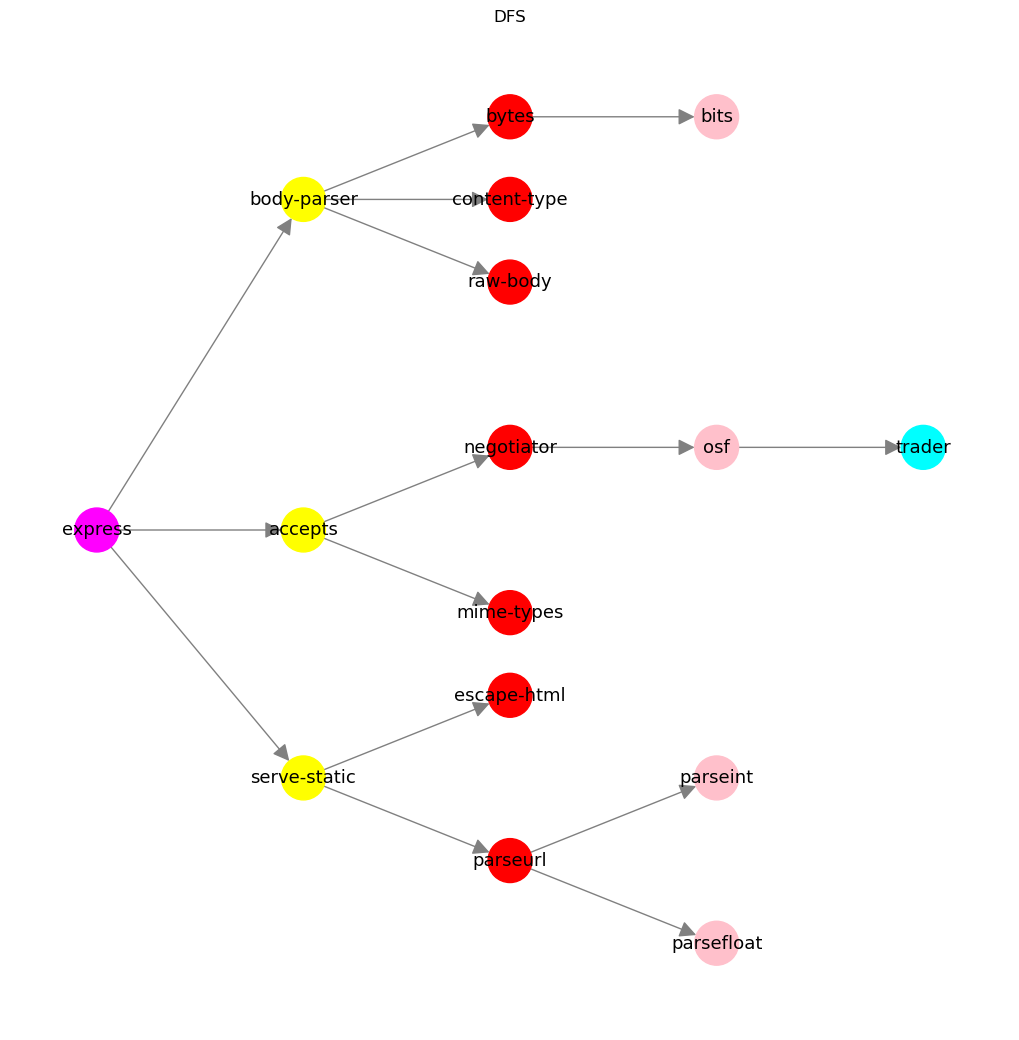

In [3]:
plotar_grafo(grafo)

In [4]:
matriz_adjacencia(grafo)

,express,body-parser,serve-static,accepts,bytes,content-type,raw-body,escape-html,parseurl,negotiator,mime-types,bits,osf,trader,parseint,parsefloat
express,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
body-parser,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
serve-static,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
accepts,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
bytes,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
content-type,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
raw-body,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
escape-html,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
parseurl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
negotiator,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
matriz_incidencia(grafo)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
express,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
body-parser,0,-1,0,1,1,1,0,0,0,0,0,0,0,0,0
serve-static,0,0,-1,0,0,0,1,1,0,0,0,0,0,0,0
accepts,-1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
bytes,0,0,0,-1,0,0,0,0,0,0,1,0,0,0,0
content-type,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0
raw-body,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0
escape-html,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0
parseurl,0,0,0,0,0,0,0,-1,0,0,0,1,1,0,0
negotiator,0,0,0,0,0,0,0,0,-1,0,0,0,0,1,0


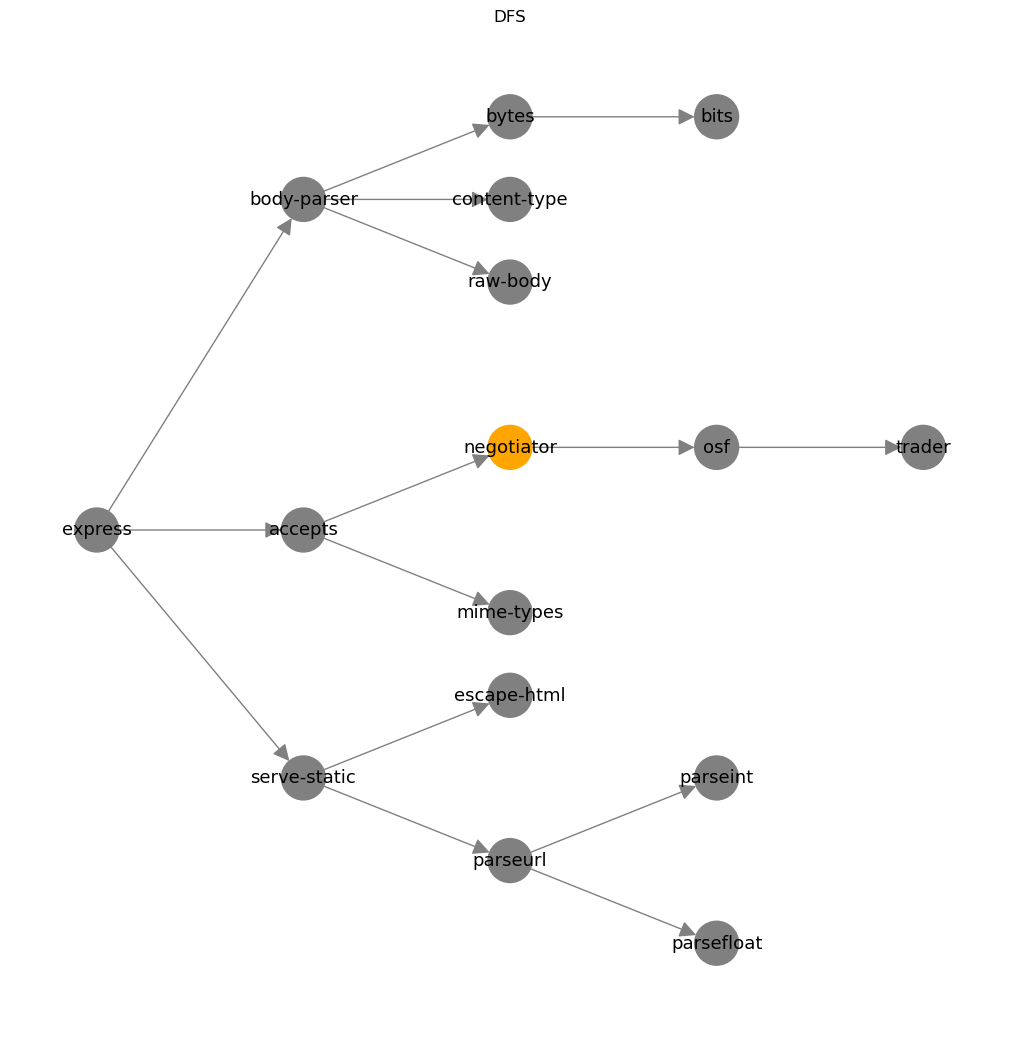

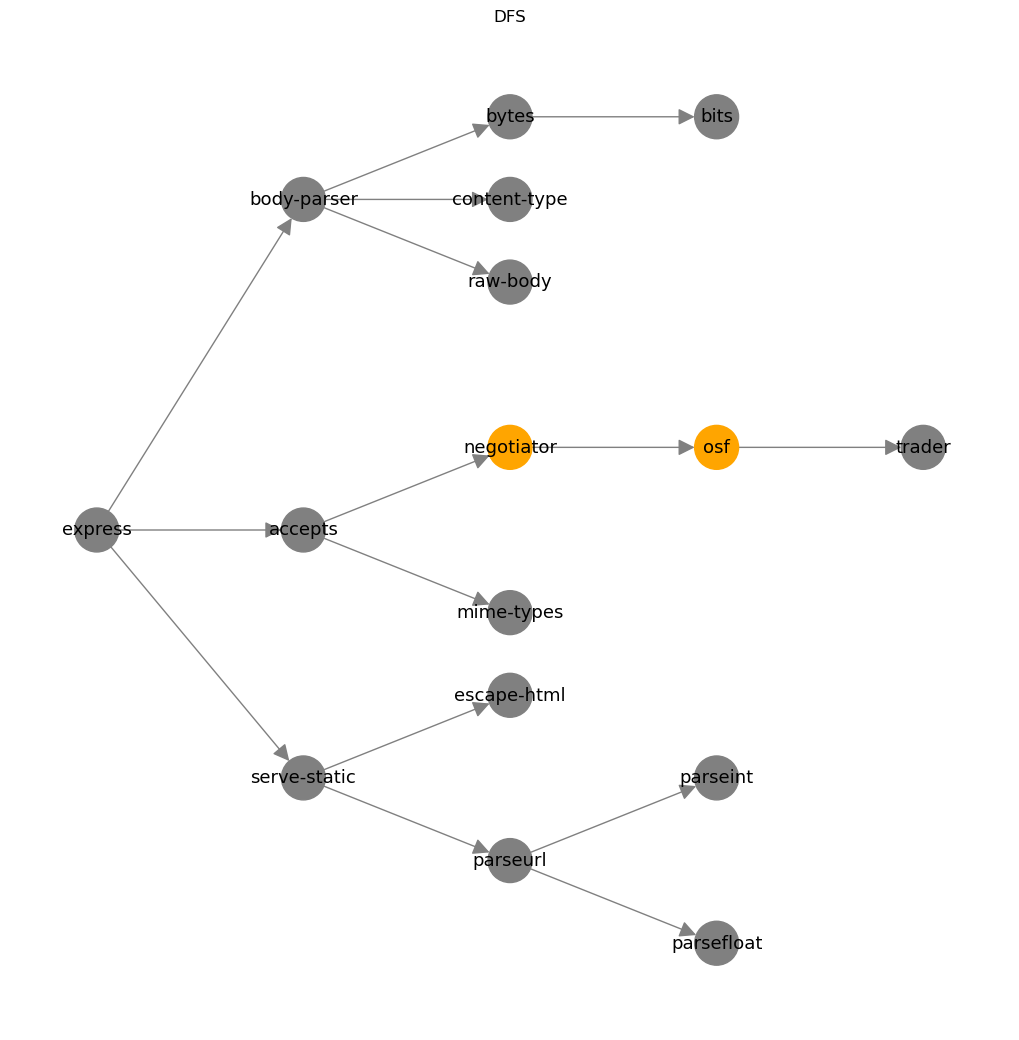

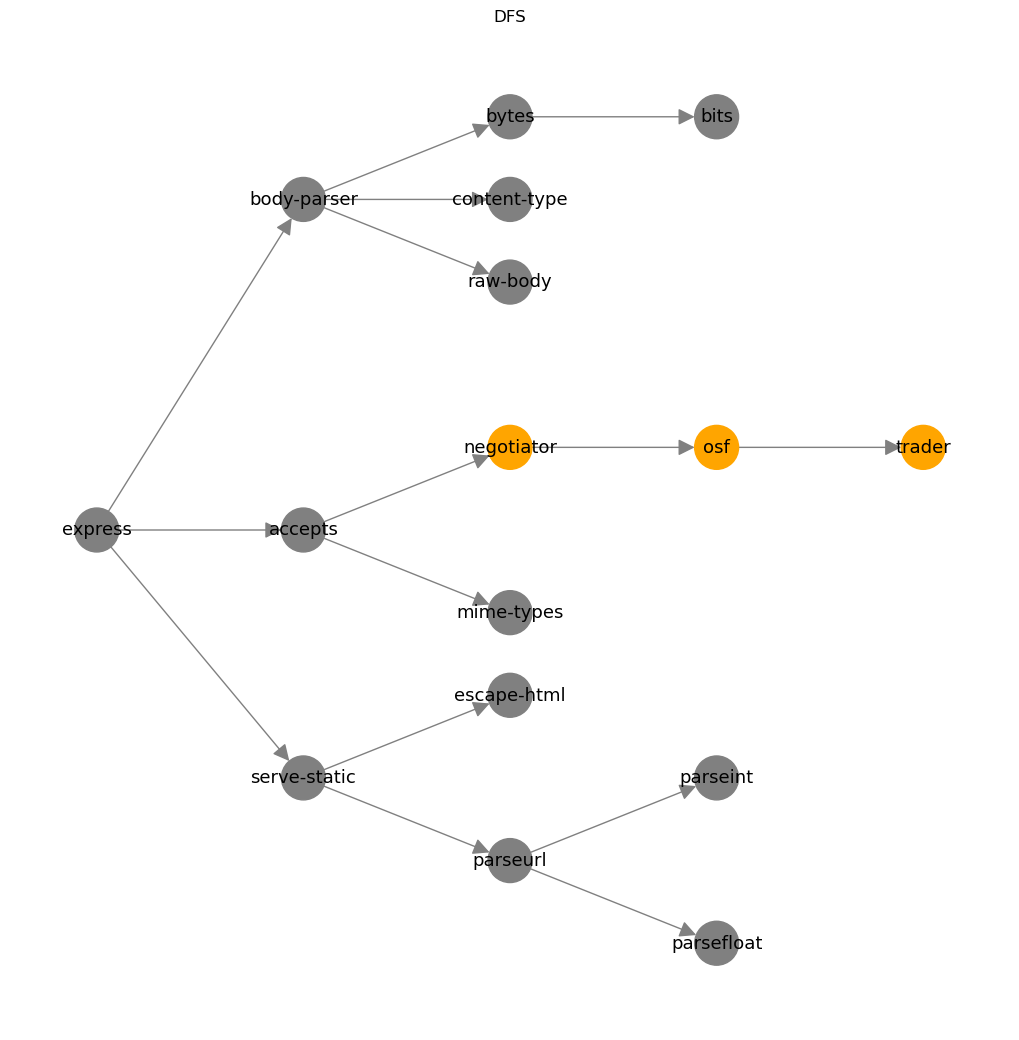

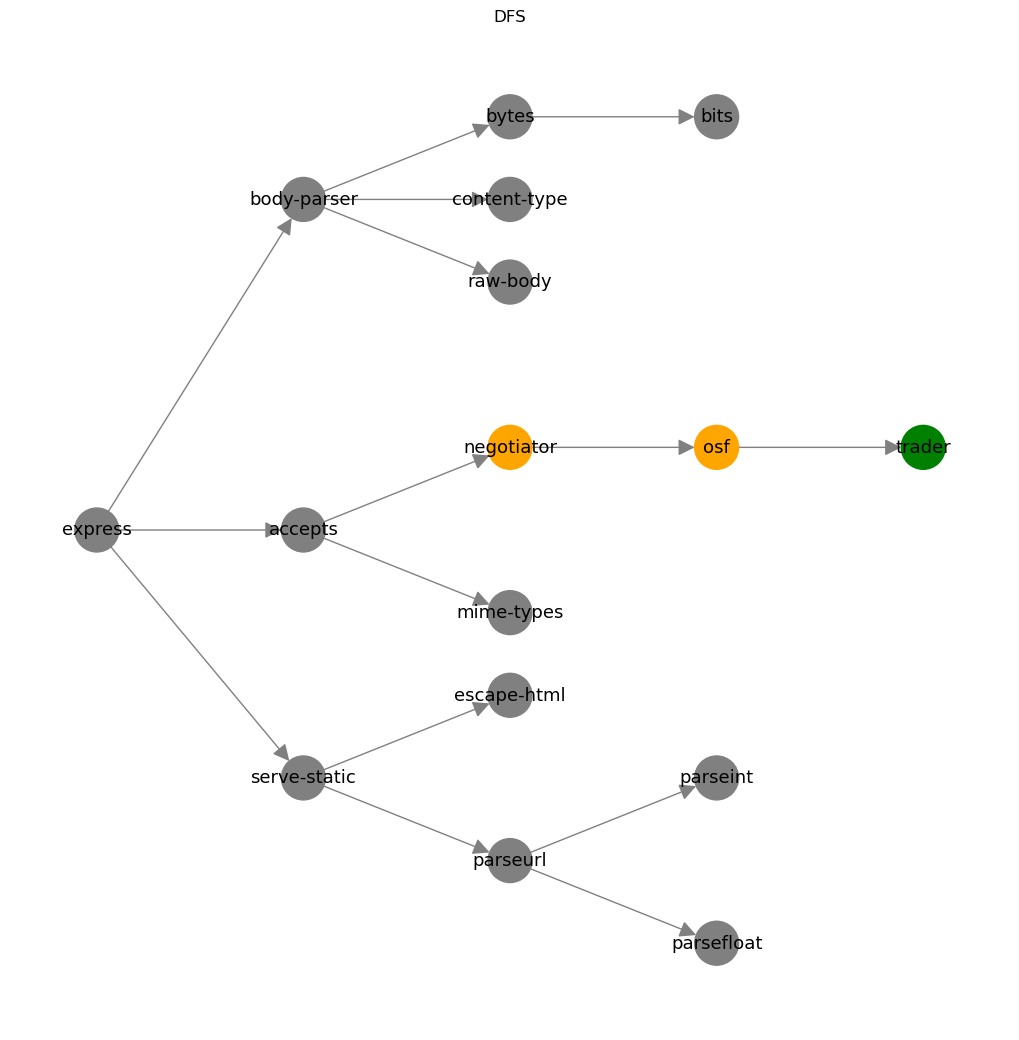

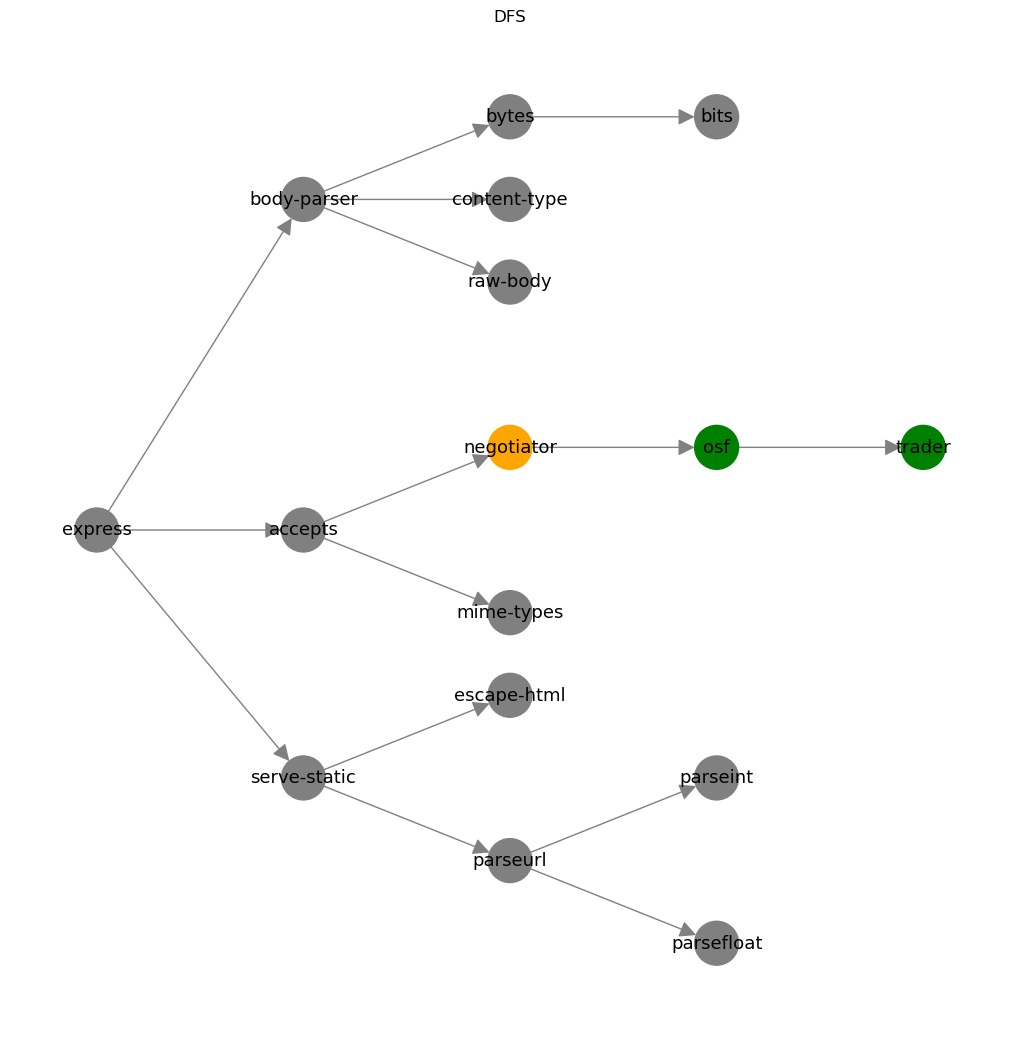

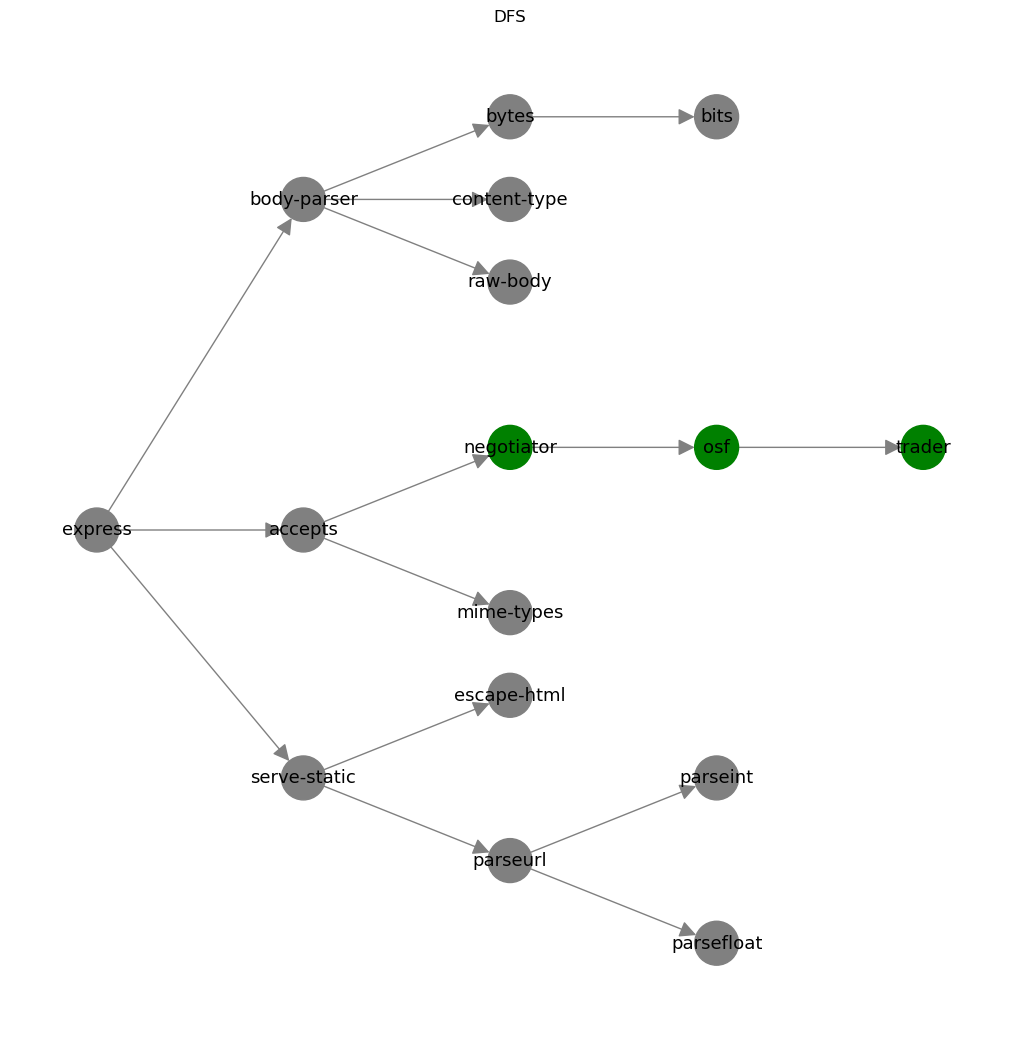

['negotiator', 'osf', 'trader']


In [6]:
#escolher qual biblioteca instalar
biblioteca= 'negotiator'

resultado = topological_sort(grafo, biblioteca)
print(resultado)